# **6.2 k-겹 교차 검증을 사용한 모델 성능 평가**

이번 장에서 배울 보편적인 **교차 검증 기법** 두 가지
- **홀드아웃 교차 검증**(holdout cross-validation)
- **k-겹 교차 검증**(k-fold cross-validation)

<br>

---

<br>


## **6.2.1 홀드아웃 방법**

### **홀드아웃 방법(holdout validation)**
데이터셋을 **두 부분**으로 나눈다.
1. **훈련 데이터셋**(Training set): 모델 훈련에 사용
2. **테스트 데이터셋**(Test set): 일반화 성능을 추정하는 데 사용

<br>

**모델 선택**
- 처음 본 데이터에서 예측 성능을 높이기 위해 **하이퍼파라미터를 튜닝하고 비교하는 과정**

<br>

**단점**
1. 모델 선택에 같은 테스트 데이터셋을 계속 사용하여, **테스트셋이 훈련 데이터셋의 일부가 되어** 모델은 과대적합된다.
    - 홀드아웃 교차 검증(holdout cross-validation)으로 보완

2. 훈련 데이터를 훈련 데이터셋과 테스트 데이터셋으로 **나누는 방법에 따라 성능 추정이 민감**할 수 있다.
    - k-겹 교차 검증(k-fold cross-validation)으로 보완

<br>


### **홀드아웃 교차 검증(holdout cross-validation)**

데이터셋을 **세 부분**으로 나눈다.
1. **훈련 데이터셋**(Training set): 모델 훈련에 사용
2. **검증 데이터셋**(Validation set): 모델 선택에 사용
3. **테스트 데이터셋**(Test set): 일반화 성능을 추정하는 데 사용

<br>

**장점**
- 테스트 데이터셋을 훈련과 모델 선택에 사용하지 않아서 **일반화 능력을 덜 편향되게 추정**할 수 있다.

<br>

아래 그림은 홀드아웃 교차 검증의 개념이다.

<br>

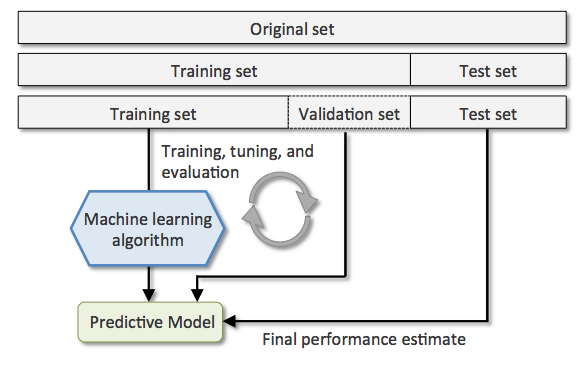

<br>

---

<br>



## **6.2.2 k-겹 교차 검증**

### **k-겹 교차 검증(k-fold cross-validation)**
1. 훈련 데이터를 중복을 허용하지 않는 **k개의 폴드**(fold)로 **랜덤하게** 나누어 **k번 홀드아웃 방법을 반복**한다.
2. **k-1개**의 폴드로 **모델을 훈련**하고, 남은 **하나**의 폴드로 **성능을 평가**한다.
3. 2번 과정을 k번 반복하여 **k개의 모델과 성능 추정**을 얻는다.
4. k개의 성능 추정을 기반으로 **평균 성능을 계산**한다.
5. **최적의 하이퍼파라미터 값**을 찾는다.
6. **전체 훈련 데이터셋을 사용**하여 모델을 다시 **훈련**한다.
7. 독립적인 테스트 데이터셋을 사용하여 **최종 성능을 추정**한다.

<br>

**특징**
- 최적의 하이퍼파라미터 값을 찾기 위해 사용
- **훈련 샘플이 많을수록** 학습 알고리즘이 더 **정확하고 안정적**인 모델을 만든다.
- 모든 샘플 포인트가 훈련하는 동안 (테스트 폴드로) **검증에 딱 한 번씩만 사용**된다.
- 홀드아웃 방법에 비해 **훈련 데이터셋의 분할에 덜 민감**하다.
- 홀드아웃 방법보다 모델 성능의 추정에 **분산이 낮다**.
- **가장 좋은 기본값은 ```k=10```**이다.

<br>

- **작은 훈련 데이터셋**: 폴드 개수를 늘리는 것이 좋음
- **큰 훈련 데이터셋**:```k=5```와 같이 작은 k 값을 선택해도 모델의 평균 성능을 정확히 추정할 수 있음


- **```k``` 값이 증가하면**: 더 낮은 편향을 만든다.
- **```k``` 값이 아주 크면**: 교차 검증 알고리즘의 실행 시간이 늘어나고, 분산이 높아진다.

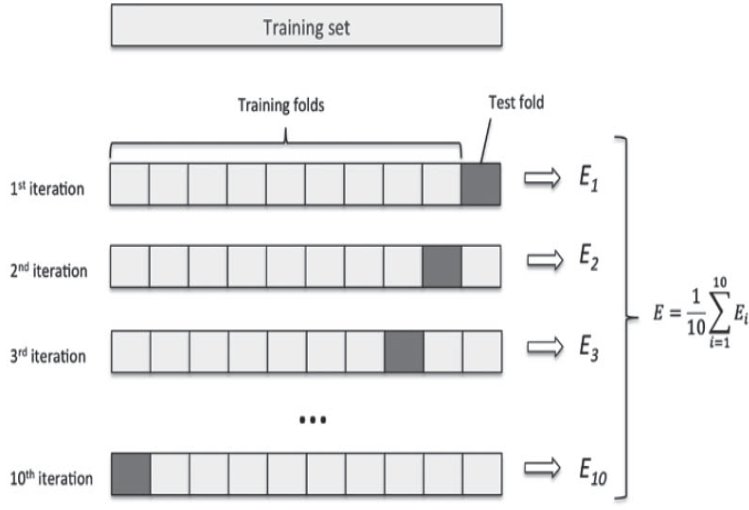

<br>

### **LOOCV(Leave-One-Out Cross-Validation)**
폴드 개수가 훈련 샘플 개수와 같다.(```k=n```)
- 하나의 훈련 샘플이 각 반복에서 테스트로 사용된다.
- 아주 작은 데이터셋을 사용할 때 권장된다.
- ```from sklearn.model_selection import LeaveOneOut```

<br>

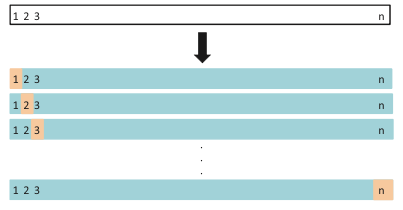

<br>


### **계층적 k-겹 교차 검증(stratified k-fold cross-validation)**
- k-겹 교차 검증보다 **더 나은 편향과 분산 추정**을 만든다.
- 각 폴드에서 클래스 비율이 **전체 훈련 데이터셋에 있는 클래스 비율을 대표하도록 유지**한다.

<br>

*(검색해보니, 일반적으로 회귀에는 기본 k-겹 교차 검증을, 분류에는 계층적 k-겹 교차 검증을 사용한다고 한다.)*